# Project 2: Features affecting price of resale HDB flats in Singapore

## Contents
---
- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Data Visualisation and Interpretation¶](#Data-Visualisation-and-Interpretation¶)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [References](#References)

## Background
---

The subject of HDB affordability has been long debated in Singapore. Land scarcity is one of the reasons why HDB flats are so expensive with some resale flats fetching prices for as high as over a million dollars. Furthermore, high resale prices of HDB flats leads to inflation in land prices surrounding them. A prominent example is prices of land spaces near mature housing estates. Another factor that feeds the increasing prices of HDB flats is the supply-demand imbalance. There are more demands for HDB flats than the government can supply which makes this a lucrative market. In addition, studies shows that the younger generation are not willing to compromise on certain features for their dream home such as the location. This makes selling HDB flats a lucrative market.

Despite cooling measures implemented by the government to moderate resale prices of HDB flats, the resale prices of HDB flats has been increasing. Hence, the time period at which the flat is sold does not greatly affect its price. At least for the time being. Besides the factors mentioned above, there could many other plausible factors that could influence the property prices of HDB flats.

## Problem Statement
---

From the perspective of a property agent, we are interested in investigating factors that affects the prices of HDB resale flats so that we can maximise our profits.

## Data Import and Cleaning
---

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import os 
if not os.path.exists('data'):
    os.makedirs('data')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import seaborn               as sns
import matplotlib.pyplot     as plt

%matplotlib inline

### Dataset Import

In [2]:
hdb = pd.read_csv('Data/train.csv', low_memory = False)
hdb.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


### Dataset Inspection

In [3]:
# Check if there are any duplicated data
hdb.duplicated().unique()

array([False])

From the above, we are able to tell that there are no duplicated entries across the rows. 

In [4]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

Based on the information, we can see that the following columns have missing values:
<ul>
    <li>Mall_Nearest_Distance</li>
    <li>Mall_Within_500m </li>
    <li>Mall_Within_1km </li>
    <li>Mall_Within_2km </li>
    <li>Hawker_Within_500m</li>
    <li>Hawker_Within_1km</li>
    <li>Hawker_Within_2km</li>
</ul>

The null values will be calculated below to have a better picture.

In [5]:
# Display column names with their respective null values
pd.set_option('display.max_rows', None)
hdb.isnull().sum().sort_values(ascending=False)

Hawker_Within_500m           97390
Mall_Within_500m             92789
Hawker_Within_1km            60868
Hawker_Within_2km            29202
Mall_Within_1km              25426
Mall_Within_2km               1940
Mall_Nearest_Distance          829
mrt_name                         0
mrt_nearest_distance             0
hawker_market_stalls             0
hawker_food_stalls               0
id                               0
Hawker_Nearest_Distance          0
3room_rental                     0
planning_area                    0
Longitude                        0
Latitude                         0
postal                           0
bus_interchange                  0
mrt_interchange                  0
mrt_latitude                     0
mrt_longitude                    0
sec_sch_latitude                 0
affiliation                      0
cutoff_point                     0
sec_sch_name                     0
sec_sch_nearest_dist             0
pri_sch_longitude                0
pri_sch_latitude    

#### Table 1. HDB dataset display

In [6]:
# Display dataset
pd.set_option('display.max_columns', None)
hdb.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


From the Table 1 above, we are able to tell that 'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km' and	'Mall_Within_2km' are related. Hence, we would like to see if 'Mall_Within_500m', 'Mall_Within_1km' and	'Mall_Within_2km' are empty when 'Mall_Nearest_Distance' is empty. (i.e., 829 empty cells for 'Mall_Within_500m','Mall_Within_1km' and 'Mall_Within_2km')

In [7]:
# Filter null values for 'Mall_Nearest_Distance' and return 'Mall_Within_500m','Mall_Within_1km','Mall_Within_2km'
mall_dist_null = hdb.loc[hdb['Mall_Nearest_Distance'].isnull(),['Mall_Nearest_Distance','Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']]
mall_dist_null.head()

,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km
75,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN
691,NaN,NaN,NaN,NaN


In [8]:
# Confirm that all 'Mall_Within_500m','Mall_Within_1km','Mall_Within_2km' are nulls
print(mall_dist_null['Mall_Within_500m'].isnull().sum())
print(mall_dist_null['Mall_Within_1km'].isnull().sum())
print(mall_dist_null['Mall_Within_2km'].isnull().sum())

829
829
829


Based on the sum of empty cells in 'Mall_Within_500m','Mall_Within_1km' and 'Mall_Within_2km' above, we can confirm that when 'Mall_Nearest_Distance' is empty, 'Mall_Within_500m','Mall_Within_1km' and 'Mall_Within_2km' are also empty. From Table 1, we are able to tell that nulls in 'Mall_Within_500m','Mall_Within_1km' and 'Mall_Within_2km' means that no malls are present. Hence, we can replace the nulls with 0 to represent the lack of a mall.

In [9]:
# Replace null with 0 for 'Mall_Within_500m','Mall_Within_1km' and 'Mall_Within_2km'
hdb[['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']] = hdb[['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']].fillna(0)
hdb.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


Likewise, from Table 1, we are able to tell that 'Hawker_Nearest_Distance', 'Hawker_Within_500m', 'Hawker_Within_1km' and 'Hawker_Within_2km' are related. Similar to malls, the nulls in 'Hawker_Within_500m', 'Hawker_Within_1km' and 'Hawker_Within_2km' represents the absence of hawkers. Hence, we can replace the nulls with 0 to represent the lack of a hawker. 

In [10]:
# Replace null with 0 for 'Hawker_Within_500m', 'Hawker_Within_1km' and 'Hawker_Within_2km'
hdb[['Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']] = hdb[['Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']].fillna(0)
hdb.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


### Determine Unnecessary Features

The following columns will be dropped from the dataset as they are deemed as unnecessary.
<ol>
    <li><b>id</b>: Not necessary for predicting resale price</li>
    <li><b>Tranc_YearMonth</b>: Based on background research, HDB prices has been increasing. Hence, the period which the flat was sold does not matter </li>
    <li><b>block</b>: 'town' would suffice as the location of the resale flat</li>
    <li><b>Tranc_Year</b>: Based on background research, HDB prices has been increasing. Hence, the period which the flat was sold does not matter</li>
    <li><b>Tranc_Month</b>: Based on background research, HDB prices has been increasing. Hence, the period which the flat was sold does not matter</li>
    <li><b>street_name</b>: It is too detailed, 'town' would suffice as the location of the resale flat</li>
    <li><b>mid_storey</b>: For 'mid_story', 'lower', 'upper' and 'mid', they do not contain all the values in 'storey_range'. Hence, it is redundant.</li>
    <li><b>lower</b>: For 'mid_story', 'lower', 'upper' and 'mid', they do not contain all the values in 'storey_range'. Hence, it is redundant.</li>
    <li><b>upper</b>: For 'mid_story', 'lower', 'upper' and 'mid', they do not contain all the values in 'storey_range'. Hence, it is redundant.</li>
    <li><b>mid</b>: For 'mid_story', 'lower', 'upper' and 'mid', they do not contain all the values in 'storey_range'. Hence, it is redundant.</li>
    <li><b>full_flat_type</b>: It is included in 'flat_type' and 'flat model'</li>
    <li><b>address</b>: It is too detailed, 'town' would suffice as the location of the resale flat</li>
    <li><b>floor_area_sqft</b>: It is the same as 'floor_area_sqm', just different units of measurement.</li>
    <li><b>max_floor_lvl</b>: Does not represent the resale unit that was sold</li>
    <li><b>residential</b>: All the HDB flats are residential</li>
    <li><b>year_completed</b>: The 'lease_commence_date' is more important for resale flats as it has to be completed before it can be sold</li>
    <li><b>postal</b>: It is the same as 'address'</li>
    <li><b>Latitude</b>: The 'postal' would suffice to indicate the location of the block</li>
    <li><b>Longitude</b>: The 'postal' would suffice to indicate the location of the block</li>
    <li><b>planning_area</b>: It is repetitive with 'town'</li>
    <li><b>Mall_Nearest_Distance</b>: 'Mall_Within_500m','Mall_Within_1km' and 'Mall_Within_2km' will be used instead to categorise the mall distance</li>
    <li><b>Hawker_Nearest_Distance</b>: 'Hawker_Within_500m', 'Hawker_Within_1km' and 'Hawker_Within_2km' will be used instead to categorise the mall distance</li>
    <li><b>mrt_name</b>: The name is not needed. The 'mrt_nearest_distance' would be more important in predicting resale price</li>
    <li><b>mrt_latitude</b>: 'mrt_nearest_distance' would suffice to indicate the location of the mrt</li>
    <li><b>mrt_longitude</b>: 'mrt_nearest_distance' would suffice to indicate the location of the mrt</li>
    <li><b>bus_stop_name</b>: The name is not needed. The 'bus_stop_nearest_distance' would be more important in predicting resale price</li>
    <li><b>bus_stop_latitude</b>: 'bus_stop_nearest_distance' would suffice to indicate the location of the bus stop</li>
    <li><b>bus_stop_longitude</b>: 'bus_stop_nearest_distance' would suffice to indicate the location of the bus stop</li>
    <li><b>pri_sch_name</b>: The name is not needed. The 'pri_sch_nearest_distance' would be more important in predicting resale price</li>
    <li><b>pri_sch_latitude</b>: 'pri_sch_nearest_distance' would suffice to indicate the location of the pri sch</li>
    <li><b>pri_sch_longitude</b>: 'pri_sch_nearest_distance' would suffice to indicate the location of the pri sch</li>
    <li><b>sec_sch_name</b>: The name is not needed. The 'sec_sch_nearest_dist' would be more important in predicting resale price</li>
    <li><b>sec_sch_latitude</b>: 'sec_sch_nearest_distance' would suffice to indicate the location of the sec sch</li>
    <li><b>sec_sch_longitude</b>: 'sec_sch_nearest_distance' would suffice to indicate the location of the sec sch</li>
</ol>

In [11]:
# Drop unnecesssary features
hdb.drop(columns=['id','Tranc_YearMonth','block', 'street_name','Tranc_Year', 'Tranc_Month' ,'mid_storey', 'lower', 'upper', 'mid','full_flat_type','floor_area_sqft','address' ,'max_floor_lvl',
                    'residential','year_completed','postal', 'Latitude', 'Longitude', 'planning_area','Mall_Nearest_Distance', 'Hawker_Nearest_Distance','mrt_name', 'mrt_latitude',
                    'mrt_longitude','bus_stop_name','bus_stop_latitude','bus_stop_longitude','pri_sch_name', 'pri_sch_latitude', 'pri_sch_longitude', 
                    'sec_sch_name','sec_sch_latitude', 'sec_sch_longitude'], inplace=True)
hdb.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
0,KALLANG/WHAMPOA,4 ROOM,10 TO 12,90.0,Model A,2006,680000.0,15,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,0.0,0.0,7.0,1.0,3.0,13.0,84,60,330.083069,0,0,29.427395,1138.633422,78,1,1138.633422,224,0
1,BISHAN,5 ROOM,07 TO 09,130.0,Improved,1987,665000.0,34,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,0.0,1.0,3.0,0.0,1.0,7.0,80,77,903.659703,1,1,58.207761,415.607357,45,1,447.894399,232,0
2,BUKIT BATOK,EXECUTIVE,13 TO 15,144.0,Apartment,1997,838000.0,24,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0,84,95,1334.251197,1,0,214.747860,498.849039,39,0,180.074558,188,0
3,BISHAN,4 ROOM,01 TO 05,103.0,Model A,1992,550000.0,29,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,0.0,1.0,4.0,0.0,1.0,9.0,32,86,907.453484,1,1,43.396521,389.515528,20,1,389.515528,253,1
4,YISHUN,4 ROOM,01 TO 03,83.0,Simplified,1987,298000.0,34,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,0.0,1.0,2.0,0.0,0.0,1.0,45,0,412.343032,0,0,129.422752,401.200584,74,0,312.025435,208,0


### Further Inspection of Dataset

In [12]:
hdb.describe()

,floor_area_sqm,lease_commence_date,resale_price,hdb_age,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
count,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.00000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,97.19763,1992.448464,4.491615e+05,28.551536,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,0.487400,1.786781,5.169046,0.488728,1.405639,3.792178,48.65298,58.138322,765.007872,0.546364,0.264024,115.258966,395.172974,55.368190,0.113195,508.533220,210.146428,0.031879
std,24.40304,12.138829,1.433076e+05,12.138829,58.349670,5.947970,11.713826,68.748273,45.302101,33.456575,19.131872,1.135483,5.350617,2.028341,11.193820,0.669842,0.024305,0.728508,1.423342,3.481453,0.766323,1.710041,4.009034,19.13878,55.495519,429.366039,0.497847,0.440814,55.572855,234.760931,17.903918,0.316832,309.066265,20.010489,0.175677
min,31.00000,1966.000000,1.500000e+05,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,21.971410,0.000000,0.000000,9.001285,45.668324,20.000000,0.000000,38.913475,188.000000,0.000000
25%,75.00000,1984.000000,3.470000e+05,20.000000,90.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,40.00000,0.000000,458.266301,0.000000,0.000000,75.032491,227.083163,44.000000,0.000000,290.285883,188.000000,0.000000
50%,95.00000,1992.000000,4.200000e+05,29.000000,112.000000,0.000000,0.000000,0.000000,44.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,1.000000,2.000000,43.00000,52.000000,682.621343,1.000000,0.000000,107.765999,348.876691,54.000000,0.000000,447.377670,208.000000,0.000000
75%,112.00000,2001.000000,5.200000e+05,37.000000,144.000000,0.000000,0.000000,66.000000,73.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000,1.000000,2.000000,7.000000,60.00000,99.000000,975.734180,1.000000,1.000000,146.652409,502.179385,67.000000,0.000000,644.284099,224.000000,0.000000
max,280.00000,2019.000000,1.258000e+06,55.000000,570.000000,255.000000,225.000000,528.000000,316.000000,164.000000,135.000000,66.000000,142.000000,110.000000,452.000000,24.000000,2.000000,6.000000,15.000000,43.000000,5.000000,9.000000,19.000000,226.00000,477.000000,3544.504228,1.000000,1.000000,443.964584,3305.841039,110.000000,1.000000,3638.977233,260.000000,1.000000


Based on the above table, we can tell that for some features, the difference between the mean and max values are quite huge. This suggests that the distribution is not normal and there are outliers. Hence, for each feature, a histogram and boxplot will be plotted to show the distribution and outliers. 

The following quantitative features will be plotted to view their distribution and outliers:
1. floor_area_sqm
2. hdb_age
3. total_dwelling_units
4. 1room_sold
5. 2room_sold
6. 3room_sold
7. 4room_sold
8. 5room_sold
9. exec_sold
10. multigen_sold
11. studio_apartment_sold
13. 1room_rental
14. 2room_rental
15. 3room_rental
16. other_room_rental
17. Mall_Within_500m
18. Mall_Within_1km
19. Mall_Within_2km
20. Hawker_Within_500m
21. Hawker_Within_1km
22. Hawker_Within_2km
23. hawker_food_stalls
24. hawker_market_stalls
25. mrt_nearest_distance
26. bus_stop_nearest_distance
27. pri_sch_nearest_distance
28. vacancy
29. sec_sch_nearest_dist
30. cutoff_point

#### Histograms

In [13]:
# Function to create histogram
def histplot(a,b,c,d,e,f):
    plt.figure(figsize=(10, 5))
    plt.subplot(2,3,1)
    sns.histplot(x= a, data=hdb, color='green')
    plt.subplot(2,3,2)
    sns.histplot(x= b, data=hdb, color='orange')
    plt.subplot(2,3,3)
    sns.histplot(x= c, data=hdb, color='purple')
    plt.subplot(2,3,4)
    sns.histplot(x= d, data=hdb, color='lightcoral')
    plt.subplot(2,3,5)
    sns.histplot(x= e, data=hdb, color='darkcyan')
    plt.subplot(2,3,6)
    sns.histplot(x= f, data=hdb, color='blue')
    plt.tight_layout()
    return plt.show();

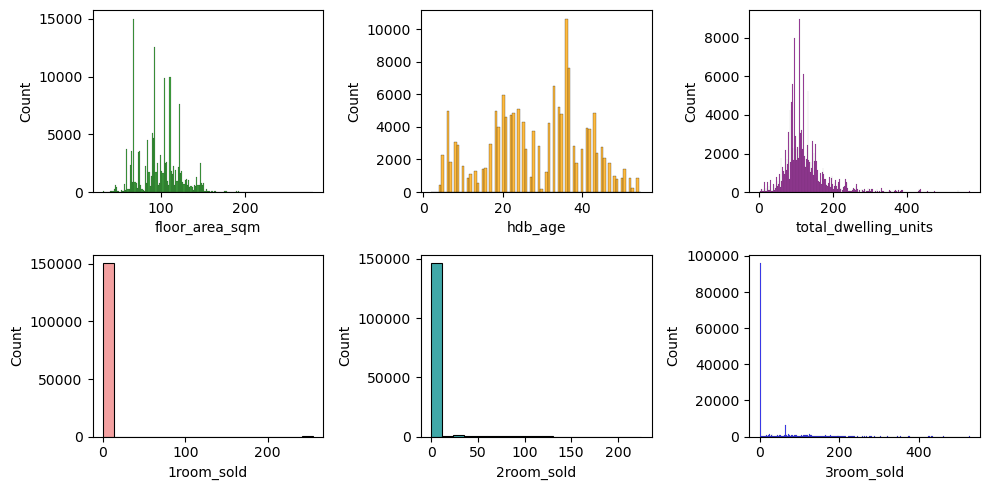

In [14]:
histplot('floor_area_sqm', 'hdb_age','total_dwelling_units','1room_sold', '2room_sold','3room_sold')

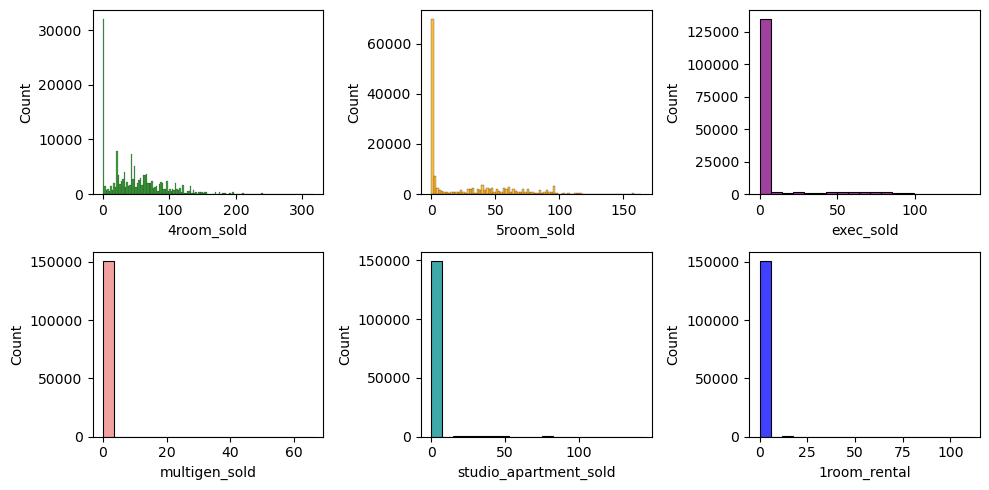

In [15]:
histplot('4room_sold', '5room_sold','exec_sold', 'multigen_sold', 'studio_apartment_sold','1room_rental')

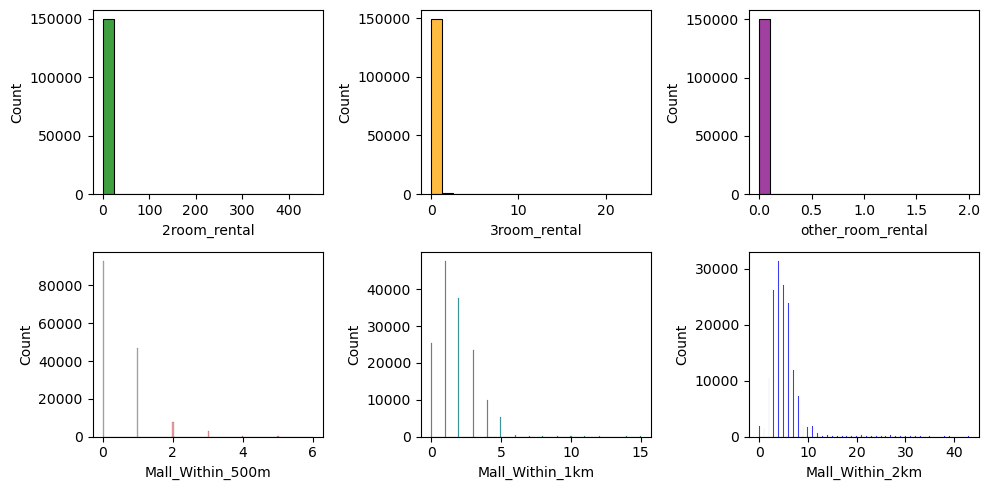

In [16]:
histplot('2room_rental','3room_rental','other_room_rental','Mall_Within_500m','Mall_Within_1km', 'Mall_Within_2km')

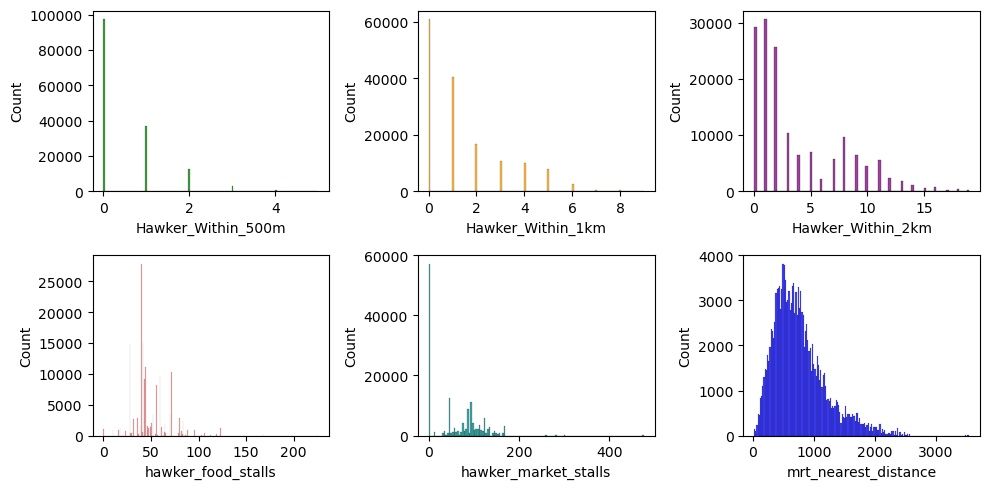

In [17]:
histplot('Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls','hawker_market_stalls', 'mrt_nearest_distance')

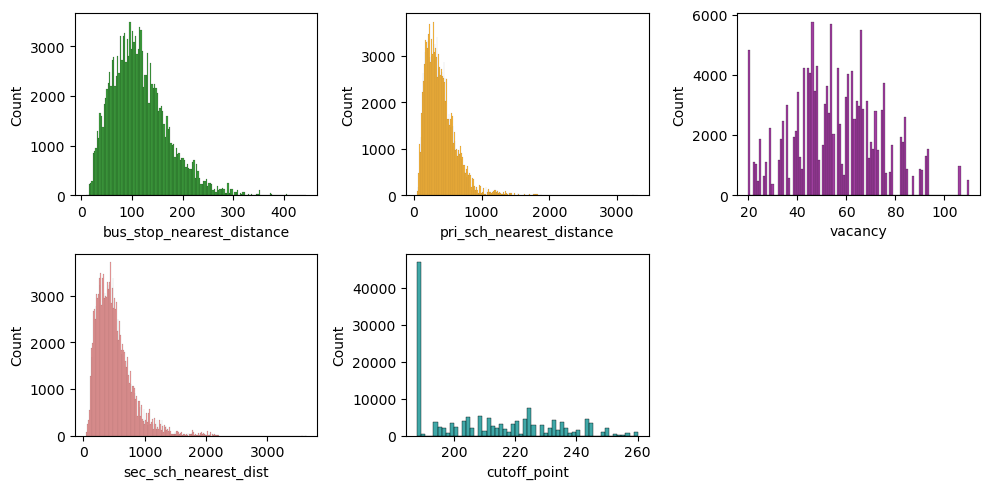

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(2,3,1)
sns.histplot(x= 'bus_stop_nearest_distance', data=hdb, color='green')
plt.subplot(2,3,2)
sns.histplot(x= 'pri_sch_nearest_distance', data=hdb, color='orange')
plt.subplot(2,3,3)
sns.histplot(x= 'vacancy', data=hdb, color='purple')
plt.subplot(2,3,4)
sns.histplot(x= 'sec_sch_nearest_dist', data=hdb, color='lightcoral')
plt.subplot(2,3,5)
sns.histplot(x= 'cutoff_point', data=hdb, color='darkcyan')
plt.tight_layout()

From the above histograms plotted, we can tell that majority of the features plotted does not follow a normal distribution. This confirms the initial inspection that the spread of the data is uneven.

#### Boxplots

In [19]:
def boxplot(a,b,c):
    plt.figure(figsize=(10, 5))
    plt.subplot(1,3,1)
    sns.boxplot(x= a, data=hdb, color='green')
    plt.subplot(1,3,2)
    sns.boxplot(x= b, data=hdb, color='orange')
    plt.subplot(1,3,3)
    sns.boxplot(x= c, data=hdb, color='purple')
    return plt.show();

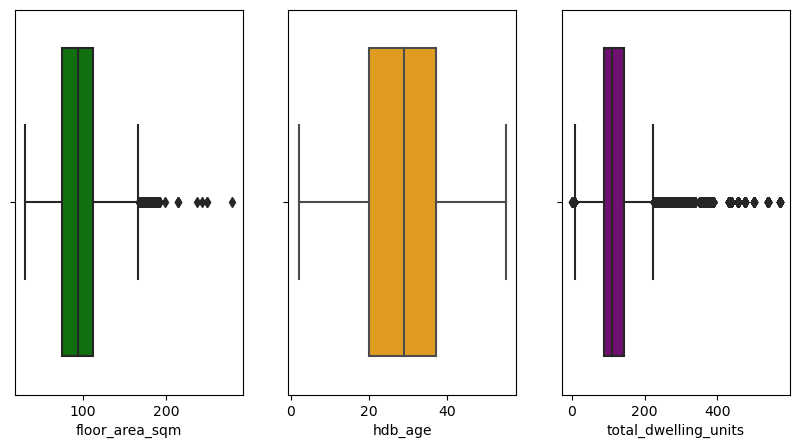

In [20]:
boxplot('floor_area_sqm','hdb_age','total_dwelling_units')

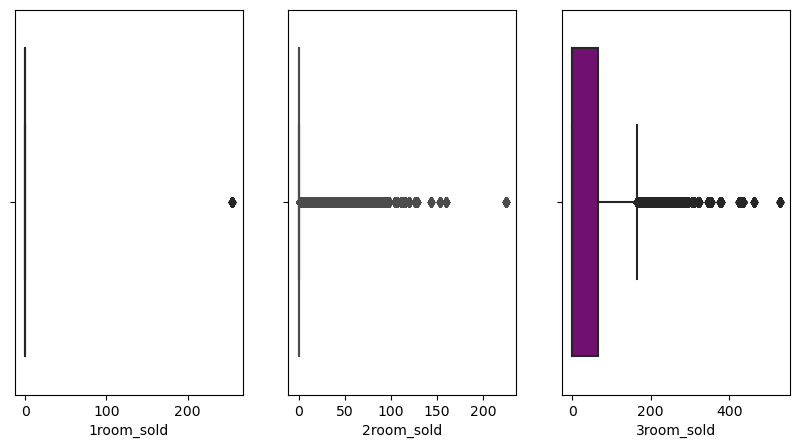

In [21]:
boxplot('1room_sold', '2room_sold', '3room_sold')

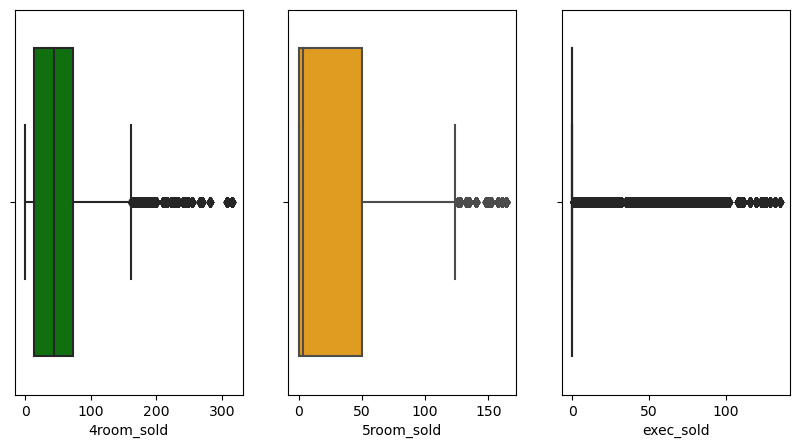

In [22]:
boxplot('4room_sold', '5room_sold', 'exec_sold')

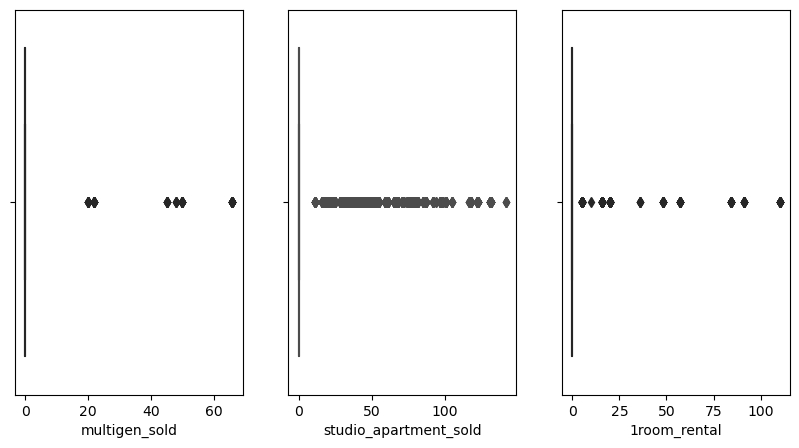

In [23]:
boxplot('multigen_sold', 'studio_apartment_sold','1room_rental')

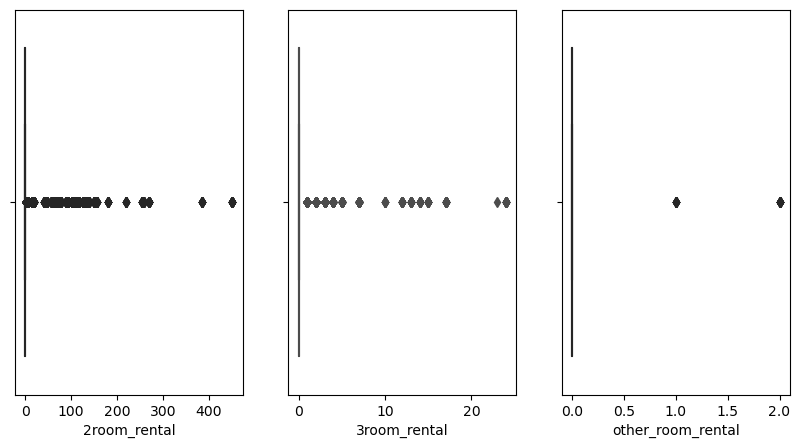

In [24]:
boxplot('2room_rental', '3room_rental', 'other_room_rental')

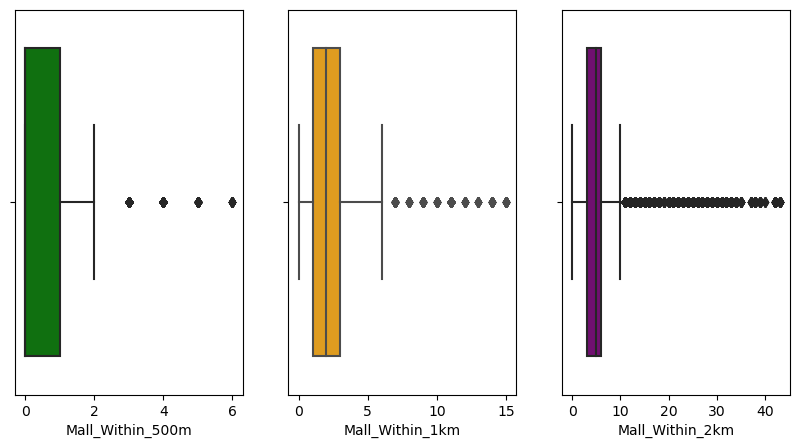

In [25]:
boxplot('Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km')

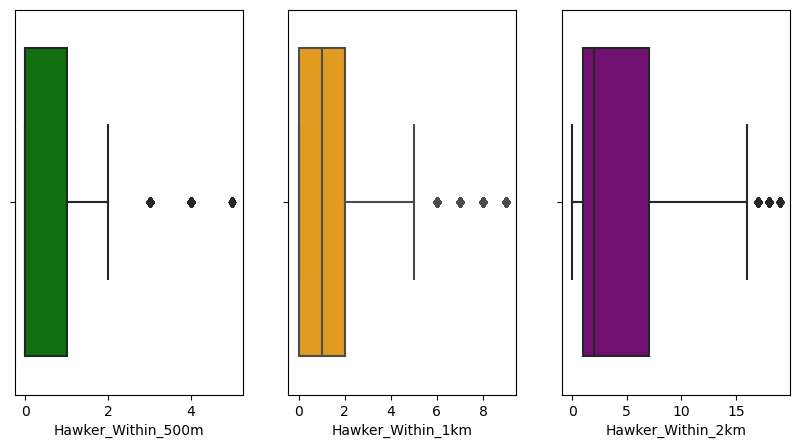

In [26]:
boxplot('Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km')

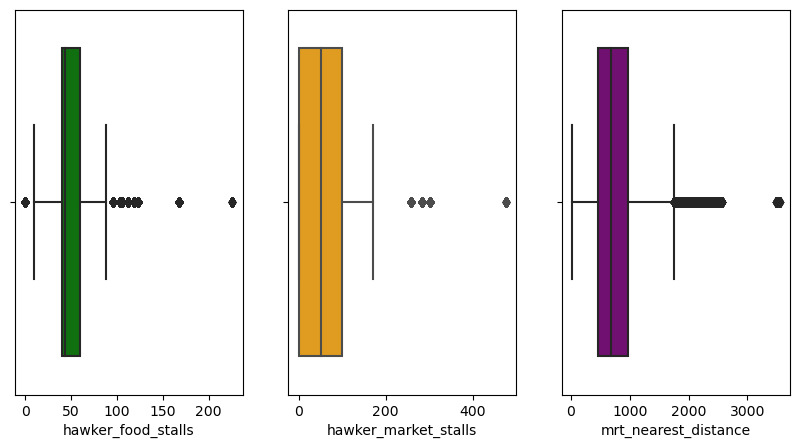

In [27]:
boxplot('hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance')

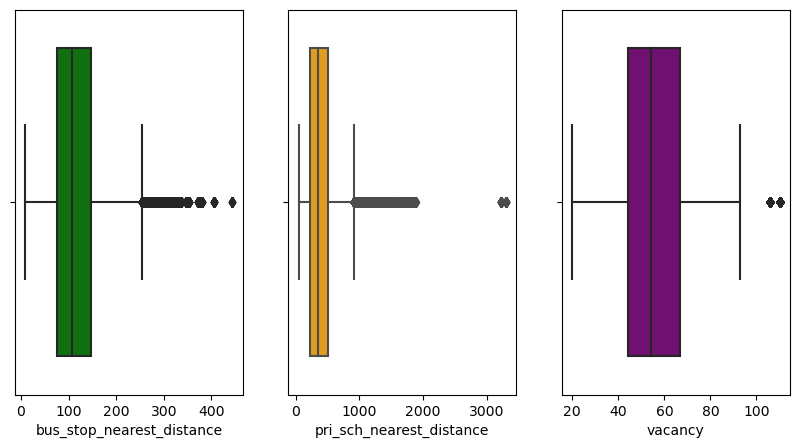

In [28]:
boxplot('bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy')

<Axes: xlabel='cutoff_point'>

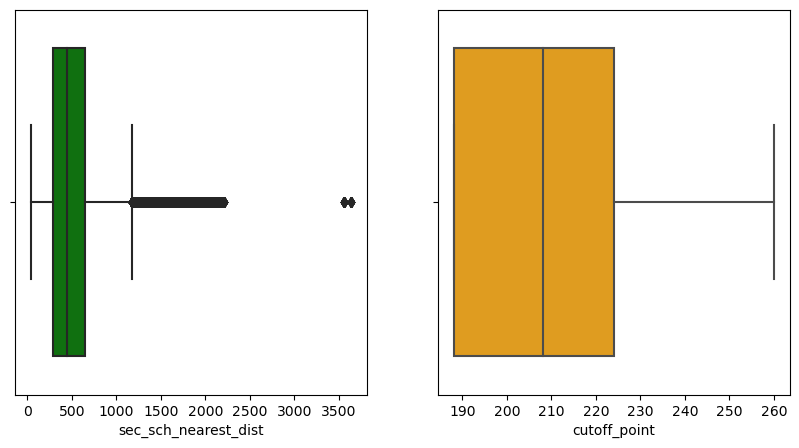

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(x= 'sec_sch_nearest_dist', data=hdb, color='green')
plt.subplot(1,2,2)
sns.boxplot(x= 'cutoff_point', data=hdb, color='orange')

From the above, we can tell that majority of the features plotted contains outliers. As these data points reflects the actual data of resale HDB flats, they should not be removed. If the outliers are removed, the accuracy and reliability of our predictions might decrease.

In [30]:
# Save and export cleaned data 
hdb.to_csv('./Data/cleaned_train_data.csv', index = False) 

## Data Visualisation and Interpretation
---

As we would like to investigate which features affects the resale prices of HDB flats, we will be using the Linear Regression, Ridge Regression and LASSO Regression models.

Feature engineering will not be done for the following reasons:

<ul>
    <li>Elderly folks might prefer a location near pavilions and hawkers. However, having a hawker centre could be independent of having a pavilion because the younger folks would prefer a hawker centre nearby for convenience but not a pavilion.</li>
    <li>Although the primary school has an affiliation with a secondary school, not all affiliated secondary schools are located near the primary school and vice versa.
        <ul>
            <li>St. Margaret's Primary School is affiliated with St. Margaret's Secondary School. However, the nearest secondary school from St. Margaret's Primary School is Geylang Methodist School</li>
            <li>Holy Innocents' Primary School is affiliated with Holy Innocents' High School. However, the nearest secondary school from Holy Innocents' Primary School is Yuying Secondary School</li>
        </ul>
    </li>
    <li>Secondary school distance and cutoff point might not be as related as we might think because we are unable to guarantee if the child can meet the cutoff point for the Secondary school.</li>
</ul>

### Determine Train Test Split

In [31]:
# Find no. of data entries
len(hdb)

150634

As the amount of data entries is quite large (150,634). It would be ideal to do a split of 70% train and 30% test.

### Train Test Split

In [32]:
# Obtain column names
columns_name=[]
for i in hdb.columns:
    columns_name.append(str(i))

In [33]:
# Remove 'resale_price'
columns_name.remove('resale_price')

In [34]:
# Define X and y
X = hdb[columns_name]
y = hdb['resale_price']

In [35]:
# Train-test-split with 70/30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state = 150)

In [36]:
# Print shape to check
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105443, 42)
(105443,)
(45191, 42)
(45191,)


### Determine Non-Categorical Features

In [37]:
# List out non-categorical features
non_cat = ['floor_area_sqm', 'hdb_age','total_dwelling_units','1room_sold', '2room_sold','3room_sold','4room_sold', 
           '5room_sold','exec_sold', 'multigen_sold', 'studio_apartment_sold','1room_rental','2room_rental','3room_rental',
           'other_room_rental','Mall_Within_500m','Mall_Within_1km', 'Mall_Within_2km','Hawker_Within_500m', 
           'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls','hawker_market_stalls', 'mrt_nearest_distance',
           'bus_stop_nearest_distance','pri_sch_nearest_distance','vacancy','sec_sch_nearest_dist','cutoff_point']

# Convert non-categorical features for train and test
non_cat_X_train = X_train[non_cat]
non_cat_X_test = X_test[non_cat]

In [38]:
# Scale the data
sc = StandardScaler()
Z_train_X = sc.fit_transform(non_cat_X_train)
Z_test_X = sc.transform(non_cat_X_test)

In [39]:
# Convert to DataFrame for Train
Z_train_X = pd.DataFrame(data=Z_train_X, columns=non_cat_X_train.columns, index=non_cat_X_train.index)
Z_train_X.head()

,floor_area_sqm,hdb_age,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,sec_sch_nearest_dist,cutoff_point
64117,-1.275786,1.849457,-0.438664,-0.024256,-0.152936,0.865631,-1.107008,-0.785433,-0.310459,-0.02145,-0.084232,-0.032387,-0.05682,-0.08881,-0.013519,-0.667368,-1.252812,-0.333807,1.975096,2.105718,0.799711,-0.452831,0.899157,-1.713543,-0.374938,0.271671,1.097980,0.346597,-1.105100
92366,0.730138,-1.034198,0.844050,-0.024256,-0.152936,-0.569635,1.460619,0.951732,-0.310459,-0.02145,-0.084232,-0.032387,-0.05682,-0.08881,-0.013519,-0.667368,-1.252812,0.234685,1.975096,2.105718,3.042867,-2.543304,1.151264,-1.557449,-0.857927,-0.168796,0.594893,0.028409,1.544255
24888,0.525452,-0.704638,0.433582,-0.024256,-0.152936,-0.569635,-1.107008,3.707236,-0.310459,-0.02145,-0.084232,-0.032387,-0.05682,-0.08881,-0.013519,2.074363,2.255007,0.518931,-0.637675,-0.236337,-0.695726,-1.079973,-0.235327,-0.936427,0.199137,0.252573,-0.243585,-0.047016,-1.105100
140177,0.934825,-0.457467,-0.233430,-0.024256,-0.152936,-0.569635,-0.288024,1.430950,-0.310459,-0.02145,-0.084232,-0.032387,-0.05682,-0.08881,-0.013519,-0.667368,0.150316,-0.049561,-0.637675,-0.821850,-0.446486,0.592405,0.520995,0.540548,2.395640,1.569553,0.538994,0.791009,-0.255307
29850,1.835444,-0.210297,-0.763618,-0.024256,-0.152936,-0.569635,-1.107008,-0.785433,3.869370,-0.02145,-0.084232,-0.032387,-0.05682,-0.08881,-0.013519,2.074363,2.255007,-0.049561,0.668711,-0.236337,-0.446486,-0.348307,-1.045673,0.003100,1.279762,-0.170900,0.035907,-0.808397,0.544499


In [40]:
# Convert to DataFrame for Test
Z_test_X = pd.DataFrame(data=Z_test_X, columns=non_cat_X_test.columns, index=non_cat_X_test.index)
Z_test_X.head()

,floor_area_sqm,hdb_age,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,sec_sch_nearest_dist,cutoff_point
94265,-0.211418,-1.858100,0.228347,-0.024256,-0.152936,0.343716,0.553096,-0.785433,-0.310459,-0.02145,-0.084232,-0.032387,-0.056820,-0.08881,-0.013519,0.703498,0.150316,-0.618053,-0.637675,-0.821850,-0.944965,-0.452831,-1.045673,3.507955,2.418622,-1.399061,-0.690774,-0.045227,0.444523
43678,0.975762,0.448825,-0.524178,-0.024256,-0.152936,-0.569635,0.265344,0.173003,-0.310459,-0.02145,-0.084232,-0.032387,-0.056820,-0.08881,-0.013519,-0.667368,1.553443,0.234685,0.668711,-0.236337,-0.446486,-0.452831,-1.045673,-0.195547,-1.677693,-0.262360,-0.243585,-0.829774,-0.305294
98739,0.238892,0.695995,-0.079504,-0.024256,-0.152936,-0.569635,-0.664314,2.209679,-0.310459,-0.02145,-0.084232,-0.032387,-0.056820,-0.08881,-0.013519,3.445228,2.255007,0.234685,-0.637675,0.349177,-0.446486,-0.191522,0.737088,-0.865491,0.229688,-0.351299,-0.523078,-0.448230,0.294560
100037,-2.135468,0.695995,2.314896,-0.024256,3.353233,-0.569635,-1.107008,-0.785433,-0.310459,-0.02145,-0.084232,-0.032387,19.322116,-0.08881,-0.013519,-0.667368,-0.551248,-0.618053,0.668711,0.349177,-0.446486,0.174311,0.971187,0.782088,-0.298276,2.535029,-0.075890,0.007049,-1.105100
115169,0.279829,-0.539857,-0.216327,-0.024256,-0.152936,-0.569635,0.663769,0.173003,-0.310459,-0.02145,-0.084232,-0.032387,-0.056820,-0.08881,-0.013519,-0.667368,0.150316,-0.333807,-0.637675,-0.821850,-0.944965,-1.079973,-0.235327,-0.368245,-0.990315,-1.318894,-0.075890,-0.296053,0.094608


After scaling the non-categorical features for the train and test sets, the scaled data are converted into data frames so that they can be merged with the categorical features later.

### Determine Categorical Features

The categorical features to be converted for the dataset are:
<ol>
    <li>town</li>
    <li>flat_type</li>
    <li>storey_range</li>
    <li>flat_model</li>
    <li>lease_commence_date</li>
    <li>commercial</li>
    <li>market_hawker</li>
    <li>multistorey_carpark</li>
    <li>precinct_pavilion</li>
    <li>bus_interchange</li>
    <li>mrt_interchange</li>
    <li>pri_sch_affiliation</li>
    <li>affiliation</li>
</ol>

As 'commercial', 'market_hawker', 'multistorey_carpark' and 'precinct_pavilion' are boolean (Y,N). They will be converted into 1 and 0.

#### Conversion for Train Set

In [41]:
# Convert 'commercial', 'market_hawker', 'multistorey_carpark' and 'precinct_pavilion' to 1/0

X_train['commercial'] = np.where(X_train['commercial'] == 'Y', 1, 0)
X_train['market_hawker'] = np.where(X_train['market_hawker'] == 'Y', 1, 0)
X_train['multistorey_carpark'] = np.where(X_train['multistorey_carpark'] == 'Y', 1, 0)
X_train['precinct_pavilion'] = np.where(X_train['precinct_pavilion'] == 'Y', 1, 0)
X_train.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
64117,TOA PAYOH,3 ROOM,07 TO 09,66.0,Improved,1970,51,1,0,0,0,99,0,0,99,0,0,0,0,0,0,0,0,0,0.0,0.0,4.0,2.0,5.0,7.0,40,108,29.189423,0,0,94.530469,459.734359,75,0,616.084968,188,0
92366,BUKIT MERAH,5 ROOM,04 TO 06,115.0,Improved,2005,16,0,0,0,0,174,0,0,0,116,58,0,0,0,0,0,0,0,0.0,0.0,6.0,2.0,5.0,16.0,0,122,96.169444,0,0,67.677509,356.284921,66,0,517.569485,241,0
24888,BUKIT PANJANG,5 ROOM,19 TO 21,110.0,Improved,2001,20,0,0,0,0,150,0,0,0,0,150,0,0,0,0,0,0,0,2.0,5.0,7.0,0.0,1.0,1.0,28,45,362.651154,1,1,126.447574,455.249078,51,0,494.216902,188,0
140177,JURONG EAST,5 ROOM,16 TO 18,120.0,Improved,1998,23,0,0,0,0,111,0,0,0,37,74,0,0,0,0,0,0,0,0.0,2.0,5.0,0.0,0.0,2.0,60,87,996.422911,1,0,248.567596,764.559371,65,0,753.681373,205,0
29850,TAMPINES,EXECUTIVE,01 TO 03,142.0,Apartment,1995,26,0,0,0,0,80,0,0,0,0,0,80,0,0,0,0,0,0,2.0,5.0,5.0,1.0,1.0,2.0,42,0,765.803422,0,0,186.527621,355.790642,56,1,258.482153,221,0


In [42]:
# Convert numerical boolean features into DataFrame 

X_train_num = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'bus_interchange', 'mrt_interchange',
              'pri_sch_affiliation','affiliation']
X_train_num = X_train[X_train_num]

The following categorical features identified will be converted using OneHotEncoder so that it can be analysed using regression.
<ol>
    <li>town</li>
    <li>flat_type</li>
    <li>storey_range</li>
    <li>flat_model</li>
    <li>lease_commence_date</li>
</ol>

In [43]:
# Convert categorical features into DataFrame

X_train_cat = ['town','flat_type','storey_range', 'flat_model', 'lease_commence_date']
X_train_cat = X_train[X_train_cat]

In [44]:
# OneHotEncoder

ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse=False, min_frequency=0.01)
encoded_array_train = ohe.fit_transform(X_train_cat)
X_train_cat = pd.DataFrame(encoded_array_train, columns=ohe.get_feature_names_out(), index=X_train_cat.index)

C:\Users\cleme\mambaforge\envs\dsi-sg\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The OneHotEncoding has been done such that categories that makes up 1% or less of the dataset will be categorised as 'infrequent'.

In [45]:
# Check if one hot encoding has been done correctly
X_train_cat.head()

,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,town_infrequent_sklearn,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_infrequent_sklearn,storey_range_01 TO 03,storey_range_01 TO 05,storey_range_04 TO 06,storey_range_06 TO 10,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_infrequent_sklearn,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Maisonette,flat_model_Model A,flat_model_Model A2,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Simplified,flat_model_Standard,flat_model_infrequent_sklearn,lease_commence_date_1974,lease_commence_date_1975,lease_commence_date_1976,lease_commence_date_1977,lease_commence_date_1978,lease_commence_date_1979,lease_commence_date_1980,lease_commence_date_1981,lease_commence_date_1982,lease_commence_date_1983,lease_commence_date_1984,lease_commence_date_1985,lease_commence_date_1986,lease_commence_date_1987,lease_commence_date_1988,lease_commence_date_1989,lease_commence_date_1992,lease_commence_date_1993,lease_commence_date_1995,lease_commence_date_1996,lease_commence_date_1997,lease_commence_date_1998,lease_commence_date_1999,lease_commence_date_2000,lease_commence_date_2001,lease_commence_date_2002,lease_commence_date_2003,lease_commence_date_2004,lease_commence_date_2011,lease_commence_date_2012,lease_commence_date_2013,lease_commence_date_2014,lease_commence_date_2015,lease_commence_date_2016,lease_commence_date_infrequent_sklearn
64117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92366,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24888,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Conversion for Test Set

In [46]:
# Convert 'commercial', 'market_hawker', 'multistorey_carpark' and 'precinct_pavilion' to 1/0

X_test['commercial'] = np.where(X_test['commercial'] == 'Y', 1, 0)
X_test['market_hawker'] = np.where(X_test['market_hawker'] == 'Y', 1, 0)
X_test['multistorey_carpark'] = np.where(X_test['multistorey_carpark'] == 'Y', 1, 0)
X_test['precinct_pavilion'] = np.where(X_test['precinct_pavilion'] == 'Y', 1, 0)
X_test.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
94265,SENGKANG,4 ROOM,10 TO 12,92.0,Model A,2015,6,0,0,0,0,138,0,0,63,75,0,0,0,0,0,0,0,0,1.0,2.0,3.0,0.0,0.0,0.0,40,0,2269.741502,1,1,249.845336,67.340879,43,0,494.770602,219,0
43678,HOUGANG,5 ROOM,01 TO 05,121.0,Improved,1987,34,0,0,0,0,94,0,0,0,62,32,0,0,0,0,0,0,0,0.0,4.0,6.0,1.0,1.0,2.0,40,0,680.563677,1,0,22.100608,334.310074,51,1,251.863346,204,0
98739,TAMPINES,4 ROOM,10 TO 12,103.0,Model A,1984,37,0,0,0,0,120,0,0,0,20,100,0,0,0,0,0,0,0,3.0,5.0,6.0,0.0,2.0,2.0,45,99,393.089806,1,1,128.146169,313.421625,46,0,369.995109,216,0
100037,WOODLANDS,2 ROOM,07 TO 09,45.0,Improved,1984,37,0,0,0,0,260,0,41,0,0,0,0,0,0,0,219,0,0,0.0,1.0,3.0,1.0,2.0,2.0,52,112,1100.067973,0,1,98.792678,991.314276,54,0,510.956100,188,0
115169,CHOA CHU KANG,4 ROOM,01 TO 03,104.0,Premium Apartment,1999,22,0,0,0,0,112,0,0,0,80,32,0,0,0,0,0,0,0,0.0,2.0,4.0,0.0,0.0,0.0,28,45,606.458528,0,0,60.317094,86.169175,54,0,417.111267,212,0


In [47]:
# Convert numerical boolean features into DataFrame 

X_test_num = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'bus_interchange', 'mrt_interchange',
             'pri_sch_affiliation','affiliation']
X_test_num = X_test[X_test_num]

The following categorical features identified will be converted using OneHotEncoder so that it can be analysed using regression.
<ol>
    <li>town</li>
    <li>flat_type</li>
    <li>storey_range</li>
    <li>flat_model</li>
    <li>lease_commence_date</li>
</ol>

In [48]:
# Convert categorical features into DataFrame

X_test_cat = ['town','flat_type','storey_range', 'flat_model', 'lease_commence_date']
X_test_cat = X_test[X_test_cat]

In [49]:
# OneHotEncoder

encoded_array_test = ohe.transform(X_test_cat)
X_test_cat = pd.DataFrame(encoded_array_test, columns=ohe.get_feature_names_out(), index=X_test_cat.index)

The OneHotEncoding has been done such that categories that makes up 1% or less of the dataset will be categorised as 'infrequent'.

In [50]:
# Check if one hot encoding has been done correctly
X_test_cat.head()

,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,town_infrequent_sklearn,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_infrequent_sklearn,storey_range_01 TO 03,storey_range_01 TO 05,storey_range_04 TO 06,storey_range_06 TO 10,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_infrequent_sklearn,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Maisonette,flat_model_Model A,flat_model_Model A2,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Simplified,flat_model_Standard,flat_model_infrequent_sklearn,lease_commence_date_1974,lease_commence_date_1975,lease_commence_date_1976,lease_commence_date_1977,lease_commence_date_1978,lease_commence_date_1979,lease_commence_date_1980,lease_commence_date_1981,lease_commence_date_1982,lease_commence_date_1983,lease_commence_date_1984,lease_commence_date_1985,lease_commence_date_1986,lease_commence_date_1987,lease_commence_date_1988,lease_commence_date_1989,lease_commence_date_1992,lease_commence_date_1993,lease_commence_date_1995,lease_commence_date_1996,lease_commence_date_1997,lease_commence_date_1998,lease_commence_date_1999,lease_commence_date_2000,lease_commence_date_2001,lease_commence_date_2002,lease_commence_date_2003,lease_commence_date_2004,lease_commence_date_2011,lease_commence_date_2012,lease_commence_date_2013,lease_commence_date_2014,lease_commence_date_2015,lease_commence_date_2016,lease_commence_date_infrequent_sklearn
94265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115169,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Combine Categorical and Non-Categorical for Train and Test

All the categorical and non-categorical features for the train and test sets will be combined so that regression can be done.

In [51]:
# Combine training dataset
Z_train = Z_train_X.join(X_train_num, how='outer')
Z_train = Z_train.join(X_train_cat, how='outer')

# Combine test dataset
Z_test = Z_test_X.join(X_test_num, how='outer')
Z_test = Z_test.join(X_test_cat, how='outer')

In [52]:
Z_train.shape

(105443, 124)

In [53]:
Z_test.shape

(45191, 124)

From the above, we can check that the no. of columns are the same for both the train and test datasets.

### Linear Regression Model

In [54]:
# Instantiate the linear regression model
lr = LinearRegression()

# Fit the model on training data
lr.fit(Z_train, y_train);

# Generate predictions for linear regression model
y_train_preds = lr.predict(Z_train)
y_test_preds = lr.predict(Z_test)

#### R2 for Linear Regression

In [55]:
# R2 value for linear regression train and test
print(f'Train: {cross_val_score(lr, Z_train, y_train, cv=5).mean()}')
print(f'Test: {cross_val_score(lr, Z_test, y_test, cv=5).mean()}')

Train: 0.8696377169917333
Test: 0.8678175271099636


A difference of about 0.2% between the train and test R2 is observed. This suggest that the model is somewhat well-fitted.

#### RMSE for Linear Regression

In [56]:
# RMSE for linear regression train
LR_RMSE_train = mean_squared_error(y_train, y_train_preds, squared=False)
LR_RMSE_train

51603.40863524422

In [57]:
# RMSE for linear regression test
LR_RMSE_test = mean_squared_error(y_test, y_test_preds, squared=False)
LR_RMSE_test

51795.7221895462

To determine the difference between the RMSE for train and test, the percentage difference will be calculated.

In [58]:
LR_RMSE_diff = ((LR_RMSE_test-LR_RMSE_train)/LR_RMSE_test)*100
round(LR_RMSE_diff, 2)

0.37

The RMSE for train is 0.37% lesser as compared to the RMSE for test. This suggest that the model could be overfitting.

### Ridge Regression

In [59]:
# Determine alpha to use
r_alphas = np.logspace(0, 5, 100)

# Instantiate the ridge regression model
ridge_model = RidgeCV(alphas=r_alphas,cv=5)

# Fit the model on training data
ridge_model.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [60]:
# Generate predictions for ridge regression model
ridge_train_predict = ridge_model.predict(Z_train)
ridge_test_predict = ridge_model.predict(Z_test)

#### R2 for Ridge Regression

In [61]:
# R2 value for ridge regression train and test
print(f'Train: {ridge_model.score(Z_train, y_train)}')
print(f'Test: {ridge_model.score(Z_test, y_test)}')

Train: 0.8701705747368129
Test: 0.8699218098875792


A difference of about 0.1% between the train and test R2 is observed. This suggest that the model is somewhat well-fitted.

#### RMSE for Ridge Regression

In [62]:
# RMSE for ridge regression train
Ridge_RMSE_train = mean_squared_error(y_train, ridge_train_predict, squared = False)
Ridge_RMSE_train 

51593.555288589145

In [63]:
# RMSE for ridge regression test
Ridge_RMSE_test = mean_squared_error(y_test, ridge_test_predict, squared = False)
Ridge_RMSE_test 

51784.26463810285

To determine the difference between the RMSE for train and test, the percentage difference will be calculated.

In [64]:
ridge_RMSE_diff = ((Ridge_RMSE_test - Ridge_RMSE_train)/Ridge_RMSE_test)*100
round(ridge_RMSE_diff, 2)

0.37

The RMSE for train is 0.37% lesser as compared to the RMSE for test. The same difference was also observed for the linear regression, suggesting that the ridge regression model could also be overfitting.

### LASSO Regression

In [65]:
# Determine alpha to use
l_alphas = np.logspace(-3, 0, 100)

# Instantiate the lasso regression model
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit the model on training data
lasso_cv.fit(Z_train, y_train);

In [66]:
# Generate predictions for lasso regression model
lasso_train_predict = lasso_cv.predict(Z_train)
lasso_test_predict = lasso_cv.predict(Z_test)

#### R2 for LASSO Regression

In [67]:
print(f'Train: {lasso_cv.score(Z_train, y_train)}') 
print(f'Test: {lasso_cv.score(Z_test, y_test)}')

Train: 0.8701712803764108
Test: 0.86992522491226


Similar to ridge regression, a difference of 0.1% between train and test R2 was observed. This also suggest that the LASSO regression model is somewhat well-fitted.

#### RMSE for LASSO Regression

In [68]:
lasso_RMSE_train = mean_squared_error(y_train, lasso_train_predict, squared=False)
lasso_RMSE_train 

51593.41507959952

In [69]:
lasso_RMSE_test = mean_squared_error(y_test, lasso_test_predict, squared=False)
lasso_RMSE_test

51783.5848711781

To determine the difference between the RMSE for train and test, the percentage difference will be calculated.

In [70]:
lasso_RMSE_diff = ((lasso_RMSE_test - lasso_RMSE_train )/lasso_RMSE_test)*100
round(lasso_RMSE_diff, 2)

0.37

The RMSE for train is 0.37% lesser as compared to the RMSE for test. The same difference was also observed for both the linear regression and ridge regression. This also suggests that the LASSO regression model could be overfitting.

### Model Selection and Results Summary

The R2 value is a relative measure of fit. It basically tells us the proportion of proportion of variability in resale price that we can explain by the features. For RMSE, it is an absolute measure of fit and it is in the same units as resale price. Hence, RMSE will be selected to determine which regression model to use.<br>

As the difference in RMSE for linear regression, ridge regression and lasso regression are the same (0.37%) when rounded to 2.sf. We will need to look into the difference further (i.e. view more than 2.sf).

In [71]:
print(f'Linear Regresession RMSE difference: {LR_RMSE_diff}')
print(f'Ridge Regresession RMSE difference: {ridge_RMSE_diff}')
print(f'LASSO Regresession RMSE difference: {lasso_RMSE_diff}')

Linear Regresession RMSE difference: 0.3712923503570644
Ridge Regresession RMSE difference: 0.3682766393353104
LASSO Regresession RMSE difference: 0.36723952590702647


In [72]:
# Compare the RMSE for test
print(f'Linear test Regresession RMSE: {LR_RMSE_test}')
print(f'Ridge test Regresession RMSE: {Ridge_RMSE_test }')
print(f'LASSO test Regresession RMSE: {lasso_RMSE_test}')

Linear test Regresession RMSE: 51795.7221895462
Ridge test Regresession RMSE: 51784.26463810285
LASSO test Regresession RMSE: 51783.5848711781


Based on the RMSE difference above, the LASSO Regression model has the least difference. This indicates that the LASSO Regression model is a better model as compared to linear and ridge regression. In addition, out of all the test RMSE, LASSO regression has the lowest RMSE. Therefore, the LASSO Regression model will be selected for analysing the HDB resale price. The coefficient will be analysed to determine the features that will affect the resale price of HDB flats.<br>

The LASSO regression model is a regularization model that minimizes overfitting by penalising the coefficients of the features. In addition, LASSO regression model will shrink the coefficients of irrelevant features to 0 which makes it easier to interpret as compared to Ridge Regression model.

In [73]:
# Display LASSO regression coefficient
lasso_coef = pd.Series(lasso_cv.coef_, index = Z_train.columns)
lasso_coef.sort_values(ascending=False)

town_infrequent_sklearn                   158544.591558
town_QUEENSTOWN                           110162.847011
town_BISHAN                               107545.299655
flat_model_DBSS                            98123.737017
flat_model_infrequent_sklearn              97464.906505
floor_area_sqm                             83601.460541
town_BUKIT MERAH                           76705.735776
town_SERANGOON                             68936.818761
town_CLEMENTI                              58660.160458
town_KALLANG/WHAMPOA                       57951.073842
town_TOA PAYOH                             56994.780234
storey_range_infrequent_sklearn            56598.510174
lease_commence_date_1975                   55326.979214
storey_range_22 TO 24                      54861.125274
storey_range_19 TO 21                      43165.556833
lease_commence_date_1977                   35326.672700
flat_model_Maisonette                      30746.424118
town_GEYLANG                               26796

Based on the LASSO regression coefficient above, there are multiple features which have a positive effect on HDB resale price. Thus, the following features with positive coefficients will be selected for discussion as we are interested in making profits from HDB resale flats. <br>
<ul>
    <li>floor_area_sqm</li>
    <li>4room_sold</li>
    <li>5room_sold</li>
    <li>flat_model_Maisonette</li>
    <li>Mall_Within_500m</li>
    <li>Mall_Within_1km</li>
    <li>Hawker_Within_500m</li>
    <li>Hawker_Within_1km</li>
    <li>Hawker_Within_2km</li>
    <li>hawker_market_stalls</li>
    <li>bus_stop_nearest_distance</li>
    <li>bus_interchange</li>
    <li>precinct_pavilion</li>
    <li>pri_sch_nearest_distance</li>
    <li>vacancy</li>
    <li>sec_sch_nearest_dist</li>
    <li>affiliation</li>
</ul>

<u>Floor area, 4 rooms, 5 rooms, Maisonette</u><br>
As Singapore's land is scarce, owning a larger property is considered a luxury. Hence, it is natural that a larger flat would resell for a premium price.<br>

- floor_area_sqm: As the floor area increases, the resale price value of the HDB flat is expected to increase by 83,601
- 5room_sold: A typical 5 room flat is expected to increase its resale value by 4,114
- 4room_sold: A typical 4 room flat is expected to increase its resale value by 1,724 
- flat_model_Maisonette: A maisonette would increase the resale price by 30,746


We can conclude that the most important factor that increases the flat's resale value for size area would be the floor square area. It would increase it by $83,601.

<u>Mall and Hawker</u><br>
Staying beside or close to malls and hawker centres makes it much more convenient for residents to purchase food and products. Residents can save their time and money on travelling.<br>

- Mall_Within_500m: The resale price would be estimated to increase by 4,651
- Mall_Within_1km: The resale price would be estimated to increase by 944
- Hawker_Within_500m: The resale price would be estimated to increase by 4,212
- Hawker_Within_1km: The resale price would be estimated to increase by 3,931
- Hawker_Within_2km: The resale price would be estimated to increase by 23,744
- hawker_market_stalls: The resale price would be estimated to increase by 7,448

Interestingly, hawker within 2km increases the resale value the most as compared to hawkers within 500m and 1km. It could be possible that there are other factors in place such as schools, mrt interchange etc. which contributes to this increase observed. People could prioritise these features instead and the nearest hawker located to these facilities is within 2km. 

<u>Bus Stop and Bus Interchange</u><br>
Having bus stop near your house would bring about more convenience in terms of travelling. Therefore, it is only logical that having a bus stop near your house would increase its resale value.<br>

- bus_stop_nearest_distance: The resale price would be estimated to increase by 432
- bus_interchange: The resale price would be estimated to increase by 15,891

From the above, we are able to tell that people prefer to live near a bus interchange as compared to near a bus stop. This is logical because a bus interchange provides more bus service options as compared to a bus stop. 

<u>Pavilion</u><br>
Having a pavilion near the HDB flat would potentially increase its resale value by 5,598. It could be possible that the pavilion serve as a common area where residents can gather and socialise. Hence, this would affect the resale price of HDB flats.<br>

<u>Primary school distance and vacancy</u><br>
For households with young children, or for couples looking to start a family, the vacancy and primary school's distance would be more favourable for them. Hence, this would markup the price of HDB flats near the area.<br>

- pri_sch_nearest_distance: The nearest distance to a primary school will increase its resale value by 2,236
- vacancy: The primary school's vacancy will only increase its resale value by 849

Based on the above, we can conclude that couple would prioritise the location of primary schools instead of the number of vacancy available.

<u>Secondary school distance and affiliation</u><br>
Families with older children would find it convenient to stay near a secondary school. In addition, if the school is affiliated with a primary school, it would be more favourable for their children to enter the secondary school. Hence, this would increase the price of HDB flats.

- sec_sch_nearest_dist: The resale price would be estimated to increase by 2,492
- affiliation: The resale price would be estimated to increase by 12,432

Surprisingly, the affiliation that the secondary school has to a primary school affects the price more than the distance. This is the opposite of what was observed for primary school where the distance matters more.

## Conclusions and Recommendations
---

It seems that HDB located near features that brings about convenience to the lives of people would fetch a higher resale value. Depending on the target audience, we can recommend HDB flats located near certain facilities to increase and optimise the success of our HDB sales. For instance, for elderly couples, we can recommend HDB flats located near pavilions and hawkers. For couples with young children, we can recommend HDB flats near primary schools. For working adults, we can recommend HDB flats located near malls, bus and MRT interchange. For large families, we can recommend HDB flats with larger space.

Further studies can include the following to better evaluate the features affecting resale prices of HDB:

- We could explore if there are multicollinearity between our features as some of them might potentially be related to each other.
  
  <u>Collection of more data</u>
- Data related to the demographics of the buyers should be collected. This will help us better understand the HDB features that different demographics of buyers are looking out for.
- Data relating to the location of other educational institutions such ITE, Polytechnics and Universities can be collected to expand our focus (i.e. families with youths)
- Data relating to the location of healthcare facilities (e.g., Hospitals, Polyclinics etc.)
- Data relating to location of playgrounds, child/student care centre, community centres etc.

## References
---

1. [The impact of cooling measures: How HDB resale prices have changed in every Singapore town](https://www.channelnewsasia.com/singapore/cooling-measures-singapore-hdb-resale-prices-towns-property-map-3499961#:~:text=Analysts%20expect%20a%20one%2Ddigit,12.7%20per%20cent%20in%202021)
2. [Supply-demand imbalances in HDB market will need time to clear](https://www.channelnewsasia.com/commentary/hdb-public-housing-bto-affordability-accessibility-supply-demand-3259186)
3. [Too choosy? Why young buyers won't compromise on dream BTO home despite long waits, rising prices](https://www.todayonline.com/big-read/young-buyers-dream-bto-home-long-waits-rising-prices-2025501)
4. [St. Margaret's Primary School  affiliation](https://www.moe.gov.sg/schoolfinder/schooldetail?schoolname=st-margarets-school-primary)
5. [Holy Innocents' Primary School affiliation](https://www.moe.gov.sg/schoolfinder/schooldetail?schoolname=holy-innocents-primary-school)


In [74]:
hdb_test = pd.read_csv('Data/test.csv', low_memory = False)
hdb_test.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,2012,11,8,7,9,8,4 ROOM Simplified,"173, YISHUN AVE 7",904.176,34,12,1986,Y,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,760173,1.437066,103.831121,Yishun,877.431572,NaN,2.0,4.0,687.576779,NaN,1.0,1.0,56,123,686.660434,Canberra,0,0,1.443077,103.829703,75.683952,Blk 174,1.437558,103.831591,426.467910,Ahmad Ibrahim Primary School,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,2019,8,5,4,6,5,5 ROOM Premium Apartment,"986C, JURONG WEST ST 93",1205.568,13,14,2002,Y,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,643986,1.336957,103.695668,Jurong West,534.037705,NaN,1.0,3.0,2122.346226,NaN,NaN,NaN,72,94,169.478175,Pioneer,0,0,1.337343,103.697143,88.993058,Blk 653B,1.336491,103.696319,439.756851,Jurong West Primary School,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,2013,10,8,7,9,8,3 ROOM New Generation,"534, ANG MO KIO AVE 10",731.952,41,12,1979,Y,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,560534,1.374058,103.854168,Ang Mo Kio,817.050453,NaN,2.0,3.0,152.287621,1.0,3.0,11.0,50,100,694.220448,Ang Mo Kio,1,0,1.369465,103.849939,86.303575,Blk 532,1.374255,103.854919,355.882207,Jing Shan Primary School,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,2017,10,2,1,3,2,4 ROOM New Generation,"29, MARSILING DR",1044.108,42,14,1976,Y,N,N,N,N,104,0,0,0,104,0,0,0,0,0,0,0,0,731029,1.442748,103.772922,Woodlands,1272.737194,NaN,NaN,3.0,501.892158,NaN,1.0,2.0,52,112,1117.203587,Marsiling,0,0,1.432757,103.773982,108.459039,Blk 32,1.443650,103.773295,929.744711,Marsiling Primary School,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,2016,8,17,16,18,17,4 ROOM Model A,"170, BT BATOK WEST AVE 8",1108.692,36,25,1985,Y,N,N,N,N,144,0,0,0,48,96,0,0,0,0,0,0,0,650170,1.346556,103.740101,Bukit Batok,1070.963675,NaN,NaN,5.0,437.593564,1.0,2.0,2.0,60,87,987.976010,Chinese Garden,0,0,1.342441,103.732225,113.645431,Blk 169,1.346899,103.741064,309.926934,Princess Elizabeth Primary School,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873


In [75]:
# Check if there are any duplicated data
hdb_test.duplicated().unique()

array([False])

In [76]:
# Replace null with 0 for 'Mall_Within_500m','Mall_Within_1km' and 'Mall_Within_2km'
hdb_test[['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']] = hdb_test[['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']].fillna(0)

# Replace null with 0 for 'Hawker_Within_500m', 'Hawker_Within_1km' and 'Hawker_Within_2km'
hdb_test[['Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']] = hdb_test[['Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']].fillna(0)
hdb_test.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,2012,11,8,7,9,8,4 ROOM Simplified,"173, YISHUN AVE 7",904.176,34,12,1986,Y,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,760173,1.437066,103.831121,Yishun,877.431572,0.0,2.0,4.0,687.576779,0.0,1.0,1.0,56,123,686.660434,Canberra,0,0,1.443077,103.829703,75.683952,Blk 174,1.437558,103.831591,426.467910,Ahmad Ibrahim Primary School,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,2019,8,5,4,6,5,5 ROOM Premium Apartment,"986C, JURONG WEST ST 93",1205.568,13,14,2002,Y,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,643986,1.336957,103.695668,Jurong West,534.037705,0.0,1.0,3.0,2122.346226,0.0,0.0,0.0,72,94,169.478175,Pioneer,0,0,1.337343,103.697143,88.993058,Blk 653B,1.336491,103.696319,439.756851,Jurong West Primary School,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,2013,10,8,7,9,8,3 ROOM New Generation,"534, ANG MO KIO AVE 10",731.952,41,12,1979,Y,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,560534,1.374058,103.854168,Ang Mo Kio,817.050453,0.0,2.0,3.0,152.287621,1.0,3.0,11.0,50,100,694.220448,Ang Mo Kio,1,0,1.369465,103.849939,86.303575,Blk 532,1.374255,103.854919,355.882207,Jing Shan Primary School,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,2017,10,2,1,3,2,4 ROOM New Generation,"29, MARSILING DR",1044.108,42,14,1976,Y,N,N,N,N,104,0,0,0,104,0,0,0,0,0,0,0,0,731029,1.442748,103.772922,Woodlands,1272.737194,0.0,0.0,3.0,501.892158,0.0,1.0,2.0,52,112,1117.203587,Marsiling,0,0,1.432757,103.773982,108.459039,Blk 32,1.443650,103.773295,929.744711,Marsiling Primary School,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,2016,8,17,16,18,17,4 ROOM Model A,"170, BT BATOK WEST AVE 8",1108.692,36,25,1985,Y,N,N,N,N,144,0,0,0,48,96,0,0,0,0,0,0,0,650170,1.346556,103.740101,Bukit Batok,1070.963675,0.0,0.0,5.0,437.593564,1.0,2.0,2.0,60,87,987.976010,Chinese Garden,0,0,1.342441,103.732225,113.645431,Blk 169,1.346899,103.741064,309.926934,Princess Elizabeth Primary School,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873


In [77]:
# Drop unnecesssary features
hdb_test.drop(columns=['Tranc_YearMonth','block', 'street_name','Tranc_Year', 'Tranc_Month' ,'mid_storey', 'lower', 'upper', 'mid','full_flat_type','floor_area_sqft','address' ,'max_floor_lvl',
                    'residential','year_completed','postal', 'Latitude', 'Longitude', 'planning_area','Mall_Nearest_Distance', 'Hawker_Nearest_Distance','mrt_name', 'mrt_latitude',
                    'mrt_longitude','bus_stop_name','bus_stop_latitude','bus_stop_longitude','pri_sch_name', 'pri_sch_latitude', 'pri_sch_longitude', 
                    'sec_sch_name','sec_sch_latitude', 'sec_sch_longitude'], inplace=True)
hdb_test.head()

,id,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
0,114982,YISHUN,4 ROOM,07 TO 09,84.0,Simplified,1987,34,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,0.0,2.0,4.0,0.0,1.0,1.0,56,123,686.660434,0,0,75.683952,426.467910,92,0,156.322353,218,0
1,95653,JURONG WEST,5 ROOM,04 TO 06,112.0,Premium Apartment,2008,13,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,0.0,1.0,3.0,0.0,0.0,0.0,72,94,169.478175,0,0,88.993058,439.756851,45,0,739.371688,199,0
2,40303,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,41,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,0.0,2.0,3.0,1.0,3.0,11.0,50,100,694.220448,1,0,86.303575,355.882207,36,0,305.071191,245,0
3,109506,WOODLANDS,4 ROOM,01 TO 03,97.0,New Generation,1979,42,N,N,N,N,104,0,0,0,104,0,0,0,0,0,0,0,0,0.0,0.0,3.0,0.0,1.0,2.0,52,112,1117.203587,0,0,108.459039,929.744711,54,0,433.454591,188,0
4,100149,BUKIT BATOK,4 ROOM,16 TO 18,103.0,Model A,1985,36,N,N,N,N,144,0,0,0,48,96,0,0,0,0,0,0,0,0.0,0.0,5.0,1.0,2.0,2.0,60,87,987.976010,0,0,113.645431,309.926934,40,0,217.295361,223,0


In [78]:
# Remove id so that it can be joined to the final results later
id = hdb_test.pop('id')

In [79]:
# Convert non-categorical features for train and test
non_cat_hdb_test = hdb_test[non_cat]

In [80]:
hdb_test_non_cat = sc.transform(non_cat_hdb_test)

In [81]:
# Convert 'commercial', 'market_hawker', 'multistorey_carpark' and 'precinct_pavilion' to 1/0

hdb_test['commercial'] = np.where(hdb_test['commercial'] == 'Y', 1, 0)
hdb_test['market_hawker'] = np.where(hdb_test['market_hawker'] == 'Y', 1, 0)
hdb_test['multistorey_carpark'] = np.where(hdb_test['multistorey_carpark'] == 'Y', 1, 0)
hdb_test['precinct_pavilion'] = np.where(hdb_test['precinct_pavilion'] == 'Y', 1, 0)
hdb_test.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
0,YISHUN,4 ROOM,07 TO 09,84.0,Simplified,1987,34,1,0,0,0,132,0,0,0,92,40,0,0,0,0,0,0,0,0.0,2.0,4.0,0.0,1.0,1.0,56,123,686.660434,0,0,75.683952,426.467910,92,0,156.322353,218,0
1,JURONG WEST,5 ROOM,04 TO 06,112.0,Premium Apartment,2008,13,0,0,0,0,53,0,0,0,28,25,0,0,0,0,0,0,0,0.0,1.0,3.0,0.0,0.0,0.0,72,94,169.478175,0,0,88.993058,439.756851,45,0,739.371688,199,0
2,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,41,0,0,0,0,218,0,0,191,22,1,1,0,0,0,0,3,0,0.0,2.0,3.0,1.0,3.0,11.0,50,100,694.220448,1,0,86.303575,355.882207,36,0,305.071191,245,0
3,WOODLANDS,4 ROOM,01 TO 03,97.0,New Generation,1979,42,0,0,0,0,104,0,0,0,104,0,0,0,0,0,0,0,0,0.0,0.0,3.0,0.0,1.0,2.0,52,112,1117.203587,0,0,108.459039,929.744711,54,0,433.454591,188,0
4,BUKIT BATOK,4 ROOM,16 TO 18,103.0,Model A,1985,36,0,0,0,0,144,0,0,0,48,96,0,0,0,0,0,0,0,0.0,0.0,5.0,1.0,2.0,2.0,60,87,987.976010,0,0,113.645431,309.926934,40,0,217.295361,223,0


In [82]:
# Convert numerical boolean features into DataFrame 

hdb_test_num = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'bus_interchange', 'mrt_interchange',
              'pri_sch_affiliation','affiliation']
hdb_test_num = hdb_test[hdb_test_num]

In [83]:
# Convert categorical features into DataFrame

hdb_test_cat = ['town','flat_type','storey_range', 'flat_model', 'lease_commence_date']
hdb_test_cat = hdb_test[hdb_test_cat]

In [84]:
# OneHotEncoder

encoded_array_hdbtest = ohe.transform(hdb_test_cat)
hdb_test_cat = pd.DataFrame(encoded_array_hdbtest, columns=ohe.get_feature_names_out(), index=hdb_test_cat.index)

In [85]:
hdb_test_cat.head()

,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,town_infrequent_sklearn,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_infrequent_sklearn,storey_range_01 TO 03,storey_range_01 TO 05,storey_range_04 TO 06,storey_range_06 TO 10,storey_range_07 TO 09,storey_range_10 TO 12,storey_range_13 TO 15,storey_range_16 TO 18,storey_range_19 TO 21,storey_range_22 TO 24,storey_range_infrequent_sklearn,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Maisonette,flat_model_Model A,flat_model_Model A2,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Simplified,flat_model_Standard,flat_model_infrequent_sklearn,lease_commence_date_1974,lease_commence_date_1975,lease_commence_date_1976,lease_commence_date_1977,lease_commence_date_1978,lease_commence_date_1979,lease_commence_date_1980,lease_commence_date_1981,lease_commence_date_1982,lease_commence_date_1983,lease_commence_date_1984,lease_commence_date_1985,lease_commence_date_1986,lease_commence_date_1987,lease_commence_date_1988,lease_commence_date_1989,lease_commence_date_1992,lease_commence_date_1993,lease_commence_date_1995,lease_commence_date_1996,lease_commence_date_1997,lease_commence_date_1998,lease_commence_date_1999,lease_commence_date_2000,lease_commence_date_2001,lease_commence_date_2002,lease_commence_date_2003,lease_commence_date_2004,lease_commence_date_2011,lease_commence_date_2012,lease_commence_date_2013,lease_commence_date_2014,lease_commence_date_2015,lease_commence_date_2016,lease_commence_date_infrequent_sklearn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Combine training dataset
hdb_test = non_cat_hdb_test.join(hdb_test_num, how='outer')
hdb_test = hdb_test.join(hdb_test_cat, how='outer')

In [87]:
# Predict using lASSO Regression Model
lasso_hdb_test_predict = lasso_cv.predict(hdb_test)

In [88]:
# Converted predicted resale price into DataFrame
lasso_hdb_test_predict = pd.DataFrame(lasso_hdb_test_predict)
lasso_hdb_test_predict.head()

,0
0,-7.713133e+06
1,8.571353e+06
2,-1.069271e+07
3,-1.522957e+07
4,-1.319119e+07


In [89]:
# Convert id column into DataFrame
id = pd.DataFrame(id)
id.head()

,id
0,114982
1,95653
2,40303
3,109506
4,100149


In [90]:
# Join id and predicted resale price
test_dataset_predict = id.join(lasso_hdb_test_predict, how='outer')

In [91]:
# Rename columns
test_dataset_predict.rename(columns={0: "Predicted", "id":"Id"}, inplace=True)
test_dataset_predict.head()

,Id,Predicted
0,114982,-7.713133e+06
1,95653,8.571353e+06
2,40303,-1.069271e+07
3,109506,-1.522957e+07
4,100149,-1.319119e+07


In [92]:
# Save and export cleaned data 
test_dataset_predict.to_csv('./Data/predicted_test_data.csv', index = False) 